Assignment-4
Download the Employee Attrition Dataset
https://www.kaggle.com/datasets/patelprashant/employee-attrition
2.Perfrom Data Preprocessing
3.Model Building using Logistic Regression and Decision Tree and Random Forest
4.Calculate Performance metrics

Data Collection.
    o	Collect the dataset or Create the dataset
•	Data Preprocessing.
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o-	Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.
•	Model Building
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model

In [86]:
#Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#Importing the dataset.
df=pd.read_csv("Employee-Attrition.csv")

In [88]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [89]:
df.shape

(1470, 35)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [91]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [92]:
#Checking for Null Values.
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [93]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [94]:
df=df.drop('EmployeeCount', axis=1) # as there are having 0 standard deviation 

In [95]:
df=df.drop('StandardHours', axis=1)


no null values in the given dataset

/tmp/ipykernel_81092/2400079689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

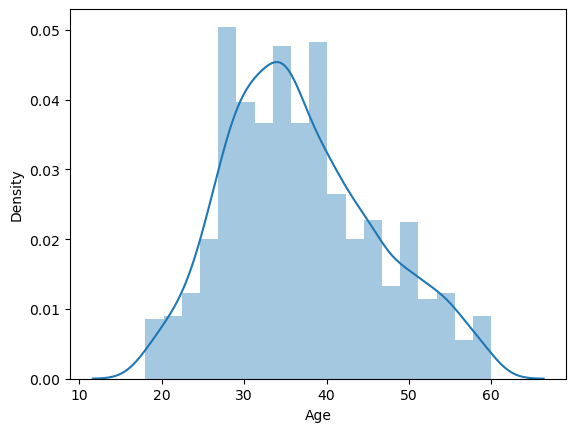

In [96]:
#Data Visualization.
sns.distplot(df["Age"])

In [97]:
corr=df.corr()

/tmp/ipykernel_81092/1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


/tmp/ipykernel_81092/3029603826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

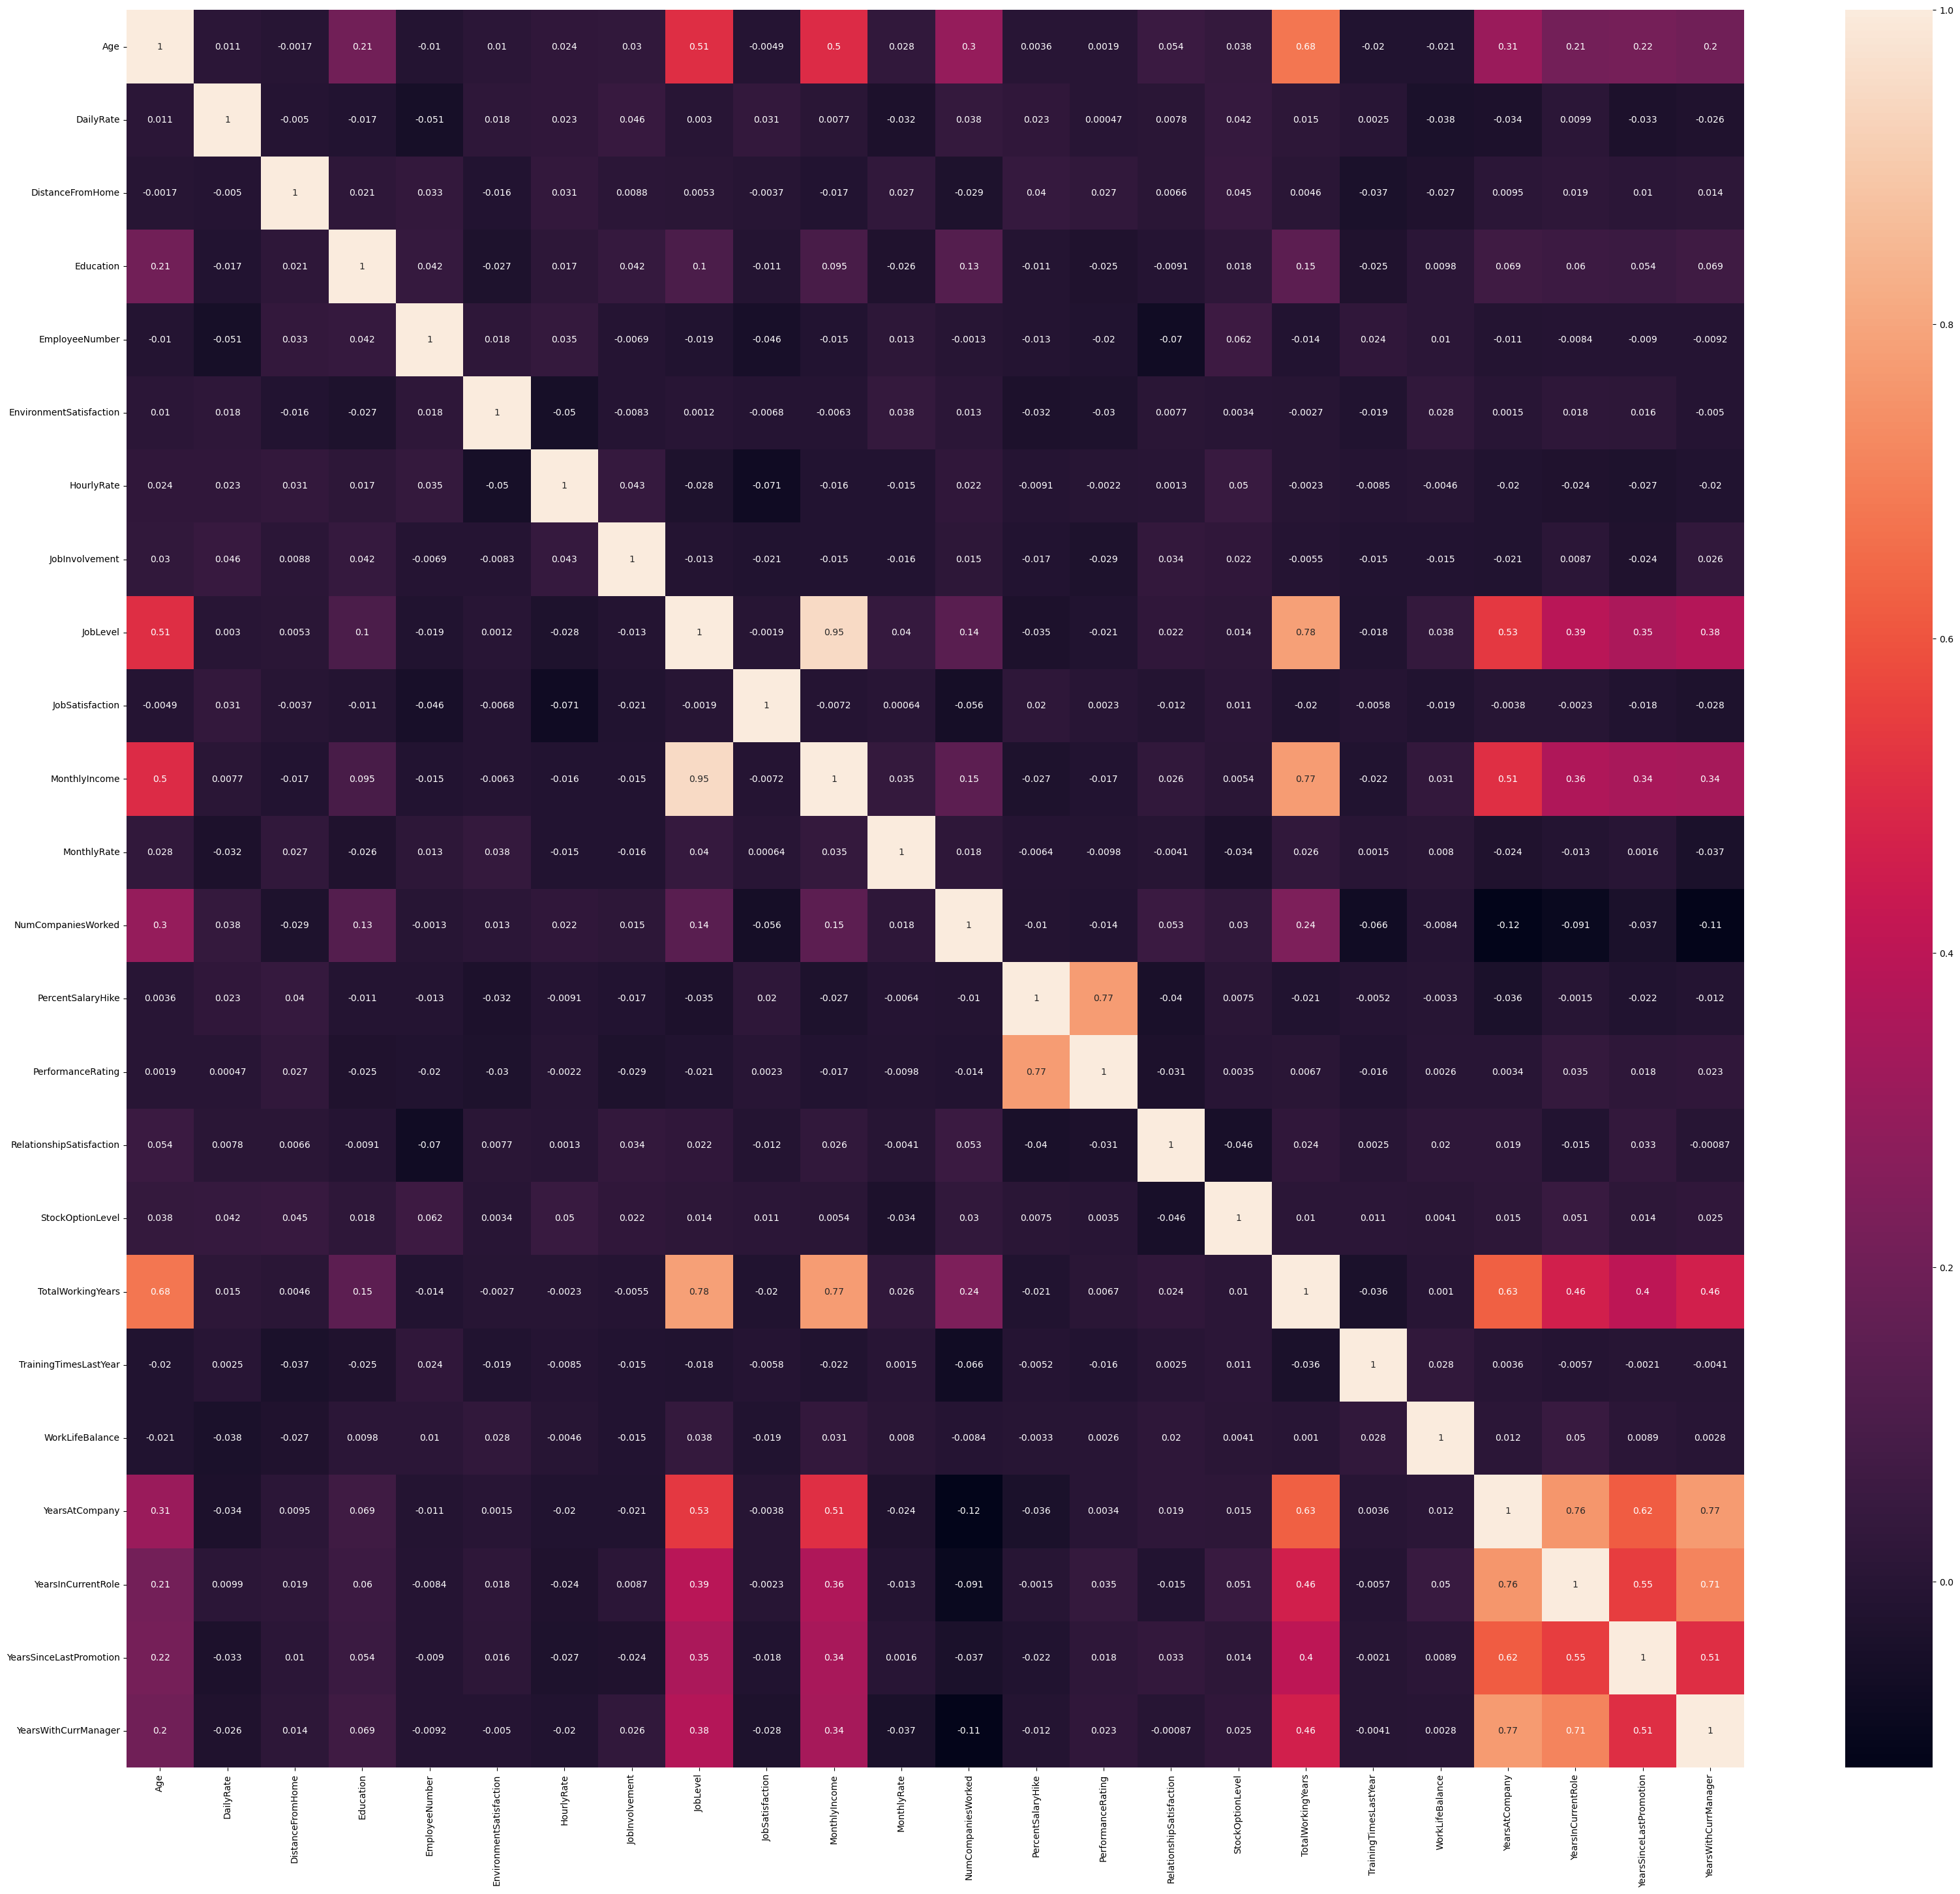

In [98]:
plt.subplots(figsize=(40,35))
sns.heatmap(df.corr(),annot=True)

<Axes: >

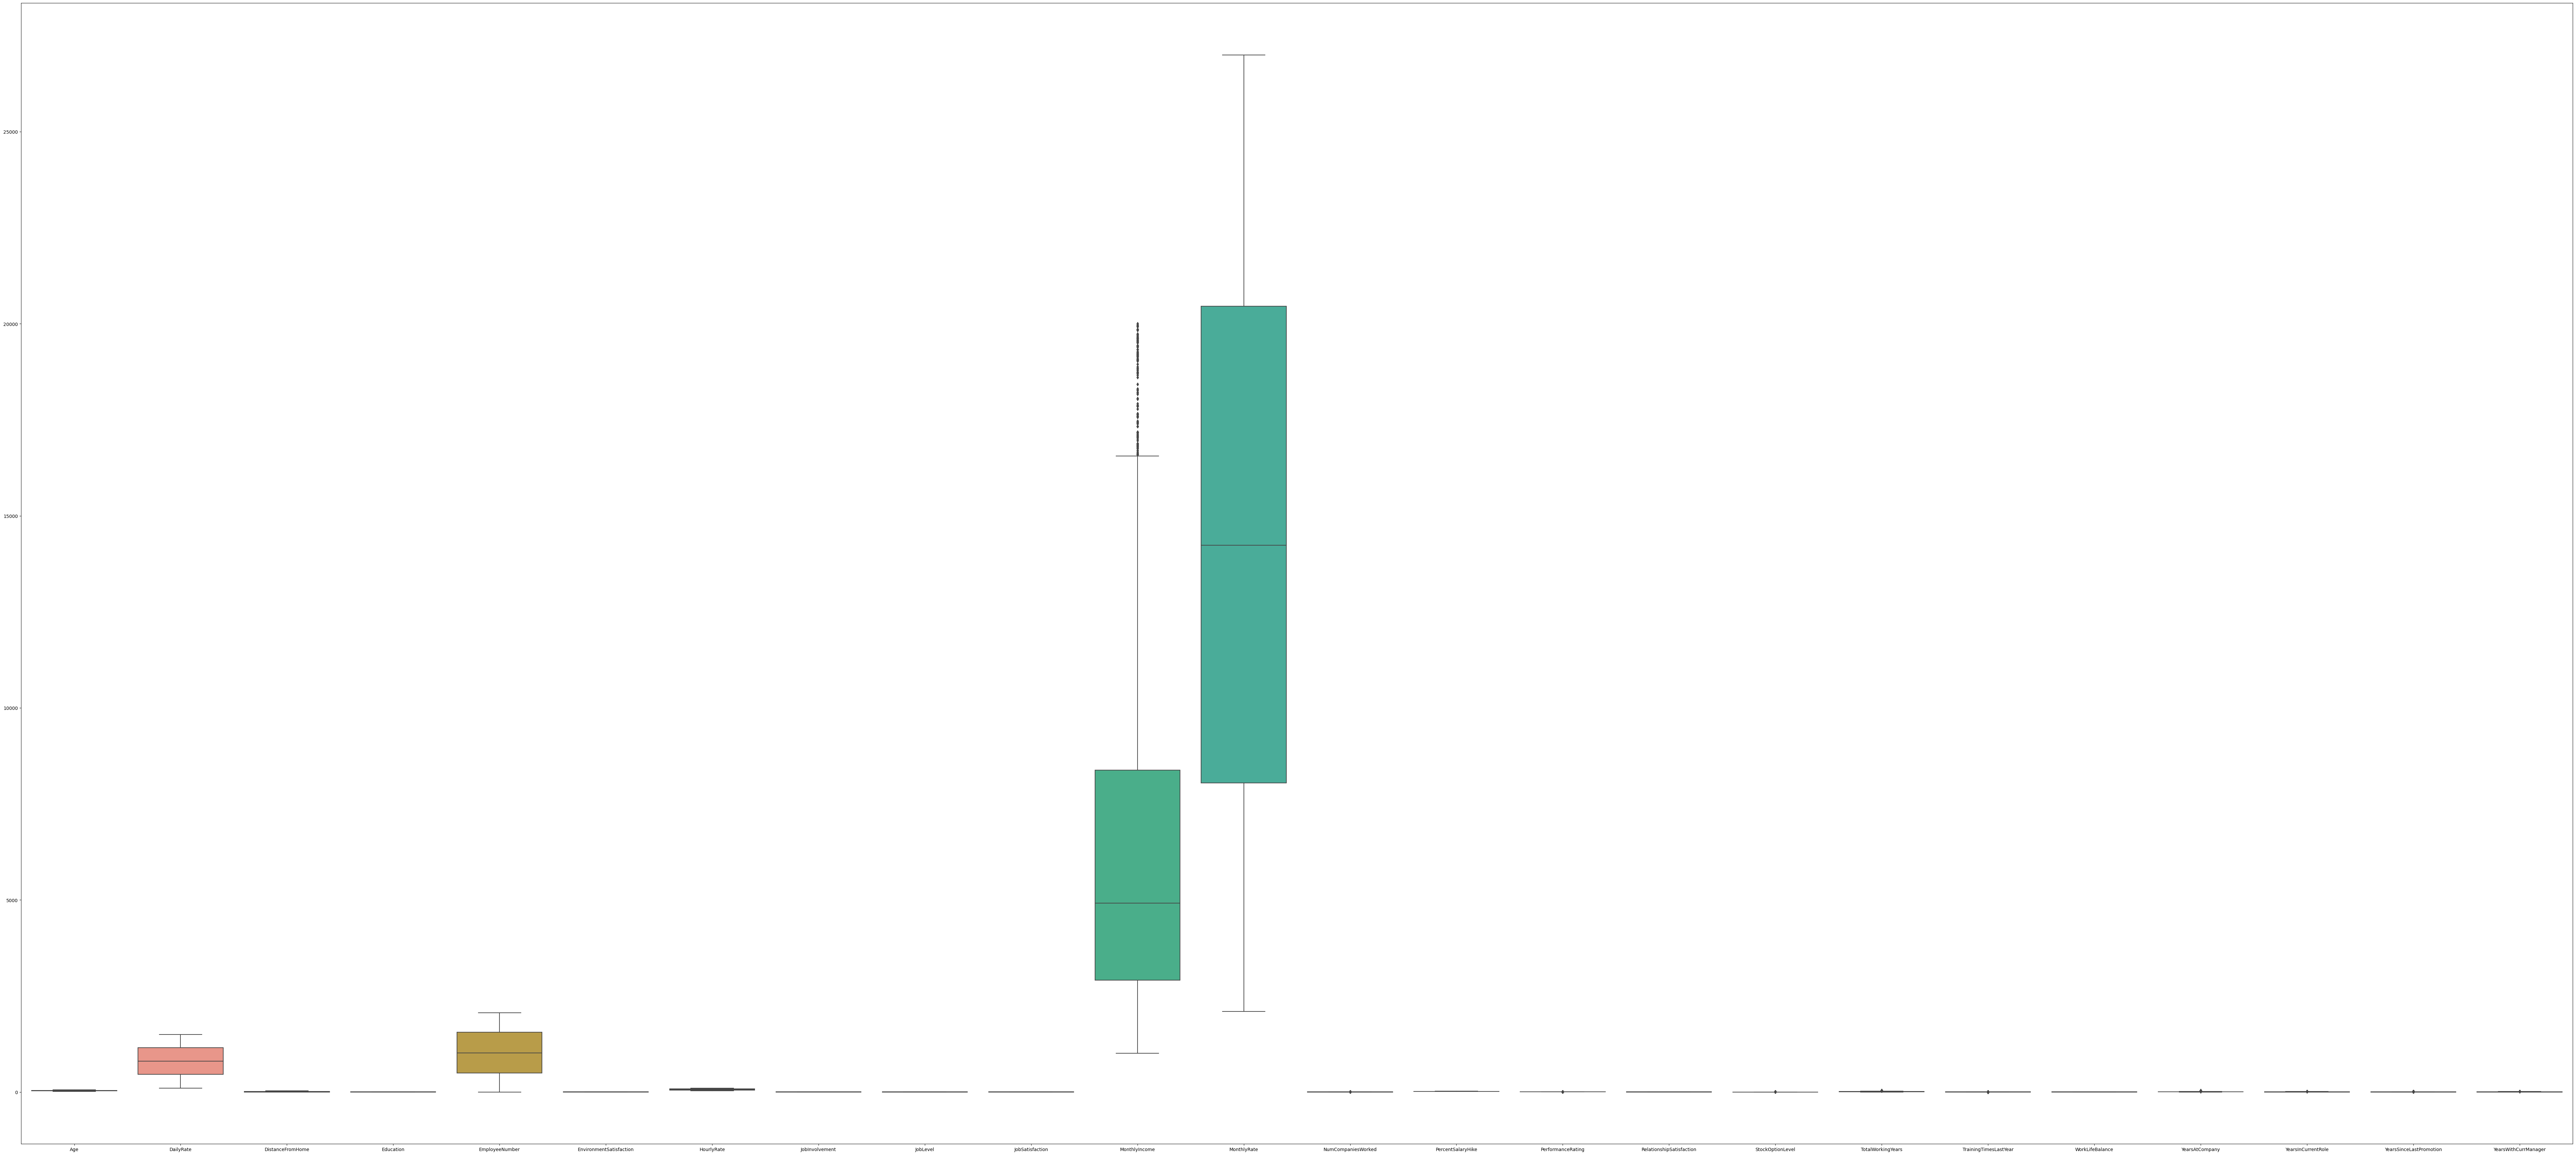

In [99]:
plt.subplots(figsize=(100,45))
sns.boxplot(df)

outliers are present in monthlyincome feature removing them using iqr method

In [100]:
q1= df.MonthlyIncome.quantile(0.25)# finding q1 formula
q3= df.MonthlyIncome.quantile(0.75)# finding q3 formula

In [101]:

IQR = q3-q1 

In [102]:
uuper_limit = q3+1.5*(IQR)
uuper_limit

16581.0

In [103]:
df=df[df.MonthlyIncome<uuper_limit]

<Axes: >

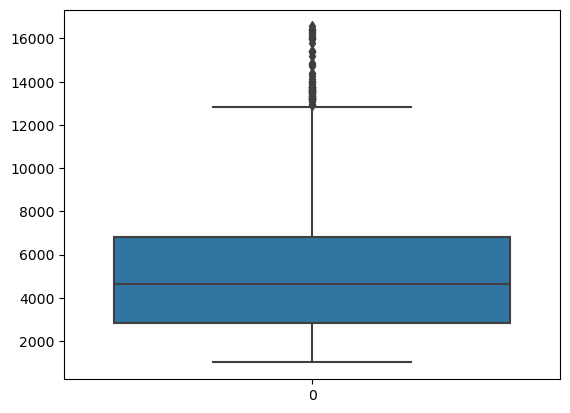

In [104]:
sns.boxplot(df['MonthlyIncome'])

In [105]:
df.shape

(1356, 33)

In [106]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [107]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [108]:
 #Convert categorical variables to dummy/indicator variables (one-hot encoding)
df = pd.get_dummies(df, columns=['Department', 'EducationField', 'MaritalStatus', 'Gender','JobRole','Over18','OverTime','BusinessTravel'], drop_first=True)

In [109]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,Yes,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,1,0,1,0,1
1,49,No,279,8,1,2,3,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,Yes,1373,2,2,4,4,92,2,1,...,1,0,0,0,0,0,0,1,0,1
3,33,No,1392,3,4,5,4,56,3,1,...,0,0,0,0,1,0,0,1,1,0
4,27,No,591,2,1,7,1,40,3,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,2061,3,41,4,2,...,1,0,0,0,0,0,0,0,1,0
1466,39,No,613,6,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,0,0,1
1467,27,No,155,4,3,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,No,1023,2,3,2065,4,63,2,2,...,0,0,0,0,0,1,0,0,1,0


In [110]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,Yes,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,1,0,1,0,1
1,49,No,279,8,1,2,3,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,Yes,1373,2,2,4,4,92,2,1,...,1,0,0,0,0,0,0,1,0,1
3,33,No,1392,3,4,5,4,56,3,1,...,0,0,0,0,1,0,0,1,1,0
4,27,No,591,2,1,7,1,40,3,1,...,1,0,0,0,0,0,0,0,0,1


In [111]:
#Splitting Dependent and Independent variables
# here the dependent variable (y) is attrition and remamining are indepdendent variables(x)
x=df.drop('Attrition', axis=1)

In [112]:
y=df.Attrition
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [113]:
x

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,1,0
4,27,591,2,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,2062,4,42,2,3,1,...,0,0,0,0,0,0,0,0,0,1
1467,27,155,4,3,2064,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,0,0,0,0,0,1,0,0,1,0


In [114]:
#feature scaling 
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [115]:
x_scaled

array([[ 0.56346638,  0.743224  , -1.02743082, ...,  1.58522975,
        -0.48937523,  0.64799328],
       [ 1.47198055, -1.29718689, -0.16621806, ..., -0.63082339,
         2.04342177, -1.54322589],
       [ 0.1092093 ,  1.41509685, -0.90440042, ...,  1.58522975,
        -0.48937523,  0.64799328],
       ...,
       [-1.02643341, -1.6046121 , -0.65833963, ...,  1.58522975,
        -0.48937523,  0.64799328],
       [ 1.47198055,  0.54736439, -0.90440042, ..., -0.63082339,
         2.04342177, -1.54322589],
       [-0.23148351, -0.43193367, -0.16621806, ..., -0.63082339,
        -0.48937523,  0.64799328]])

In [116]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [117]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1084, 45), (272, 45), (1084,), (272,))

In [118]:
x_train

array([[-0.11791924,  0.84239343,  1.67923787, ...,  1.58522975,
        -0.48937523,  0.64799328],
       [ 1.244852  ,  0.89197814, -1.02743082, ..., -0.63082339,
        -0.48937523, -1.54322589],
       [ 0.56346638, -1.57486127,  0.32590352, ...,  1.58522975,
        -0.48937523,  0.64799328],
       ...,
       [ 2.0398019 , -1.59965363,  0.07984273, ...,  1.58522975,
        -0.48937523,  0.64799328],
       [-0.00435497, -1.18314205,  0.07984273, ..., -0.63082339,
        -0.48937523,  0.64799328],
       [ 0.56346638, -0.62035557, -0.65833963, ..., -0.63082339,
        -0.48937523, -1.54322589]])

Model Building
o	Import the model building Libraries
o	Initializing the model
o	Training and testing the model
o	Evaluation of Model
o	Save the Model

# Model Building using logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [120]:
model.fit(x_train,y_train)

LogisticRegression()

In [121]:
pred=model.predict(x_test)
pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No

In [122]:
y_test

52       No
984      No
1428     No
393      No
1014     No
       ... 
818      No
800     Yes
1397     No
423      No
792     Yes
Name: Attrition, Length: 272, dtype: object

Evaluation of classification model

In [123]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [124]:
accuracy_score(y_test,pred)

0.9007352941176471

In [125]:
confusion_matrix(y_test,pred)

array([[218,   6],
       [ 21,  27]])

In [126]:
pd.crosstab(y_test,pred)

col_0,No,Yes
Attrition,,
No,218,6
Yes,21,27


In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.91      0.97      0.94       224
         Yes       0.82      0.56      0.67        48

    accuracy                           0.90       272
   macro avg       0.87      0.77      0.80       272
weighted avg       0.90      0.90      0.89       272



In [128]:
#tunning hyperparameters using gridcv
from sklearn.model_selection import GridSearchCV
lg = LogisticRegression(random_state=123)
# Create grid parameters for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}
# Create gridsearch instance

lr = LogisticRegression()
clf = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [129]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/aravindkota/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aravindkota/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [130]:
best_params = clf.best_params_
best_model = clf.best_estimator_
accuracy = best_model.score(x_test, y_test)
accuracy

0.8970588235294118

In [131]:
grid_predict = best_model.predict(x_test)

In [132]:
print(classification_report(y_test, grid_predict)) 

              precision    recall  f1-score   support

          No       0.90      0.98      0.94       224
         Yes       0.86      0.50      0.63        48

    accuracy                           0.90       272
   macro avg       0.88      0.74      0.79       272
weighted avg       0.89      0.90      0.89       272



In [133]:
confusion_matrix(y_test,grid_predict)

array([[220,   4],
       [ 24,  24]])

In [134]:
#final best accuracy
accuracy_score(y_test,pred)


0.9007352941176471

In [135]:
#final confusion matrix
confusion_matrix(y_test,pred)

array([[218,   6],
       [ 21,  27]])

# Model building using decision tree 

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

In [137]:
dtc.fit(x_train, y_train)    
# print prediction results 
predictions = dtc.predict(x_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

          No       0.87      0.86      0.86       224
         Yes       0.38      0.42      0.40        48

    accuracy                           0.78       272
   macro avg       0.63      0.64      0.63       272
weighted avg       0.79      0.78      0.78       272



In [138]:
 #accuracy score
accuracy_score(y_test,predictions)

0.7794117647058824

In [139]:
clf = DecisionTreeClassifier(random_state=123)
# Create grid parameters for hyperparameter tuning
params =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}

# Create gridsearch instance
grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)
# fitting the model for grid search 
grid.fit(x_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(x_test)  


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_sa

In [140]:
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

          No       0.84      0.98      0.91       224
         Yes       0.64      0.15      0.24        48

    accuracy                           0.83       272
   macro avg       0.74      0.56      0.57       272
weighted avg       0.81      0.83      0.79       272



In [141]:
confusion_matrix(y_test,grid_predictions)

array([[220,   4],
       [ 41,   7]])

In [142]:
#final accuracy
accuracy_score(y_test,grid_predictions)

0.8345588235294118

In [143]:
#final confusion matrix
confusion_matrix(y_test,grid_predictions)

array([[220,   4],
       [ 41,   7]])

# Model building using random forest 

In [144]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [145]:
pred=rfc.predict(x_test)
pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', '

In [146]:
accuracy_score(y_test,pred)

0.8382352941176471

In [147]:
confusion_matrix(y_test,pred)

array([[223,   1],
       [ 43,   5]])

In [148]:
pd.crosstab(y_test,pred)

col_0,No,Yes
Attrition,,
No,223,1
Yes,43,5


In [149]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91       224
         Yes       0.83      0.10      0.19        48

    accuracy                           0.84       272
   macro avg       0.84      0.55      0.55       272
weighted avg       0.84      0.84      0.78       272



In [150]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=123)
# Create grid parameters for hyperparameter tuning
params =  {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7],
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}

# Create gridsearch instance
grid = GridSearchCV(estimator=rfc,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)
# fitting the model for grid search 
grid.fit(x_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
grid_prediction = grid.predict(x_test)  

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, max_features=1, min_samples_leaf=1, n_estimators=10; total time=   

In [156]:
print('Best score is: '+str(grid.best_score_))

Best score is: 0.8404349303431872


In [152]:
# print classification report 
print(classification_report(y_test, grid_prediction)) 

              precision    recall  f1-score   support

          No       0.82      1.00      0.90       224
         Yes       0.00      0.00      0.00        48

    accuracy                           0.82       272
   macro avg       0.41      0.50      0.45       272
weighted avg       0.68      0.82      0.74       272



/Users/aravindkota/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aravindkota/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aravindkota/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
confusion_matrix(y_test,grid_predictions)

array([[220,   4],
       [ 41,   7]])

In [154]:
#final confusion matrix
confusion_matrix(y_test,pred)

array([[223,   1],
       [ 43,   5]])

In [155]:
#final better accuracy
accuracy_score(y_test,pred)

0.8382352941176471